In [2]:
import torch
import numpy
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [4]:
n_dim = 2
x_train, y_train = make_blobs(n_samples=80, n_features=n_dim,
                              centers=[[1, 1], [-1, -1], [1, -1], [-1, 1]],
                              shuffle=True, cluster_std=0.3)
x_test, y_test = make_blobs(n_samples=20, n_features=n_dim,
                            centers=[[1, 1], [-1, -1], [1, -1], [-1, 1]],
                            shuffle=True, cluster_std=0.3)

In [5]:
def label_map(y_, from_, to_):
    y = numpy.copy(y_)
    for f in from_:
        y[y_ == f] = to_
    return y


y_train = label_map(y_train, [0, 1], 0)
y_train = label_map(y_train, [2, 3], 1)
y_test = label_map(y_test, [0, 1], 0)
y_test = label_map(y_test, [2, 3], 1)

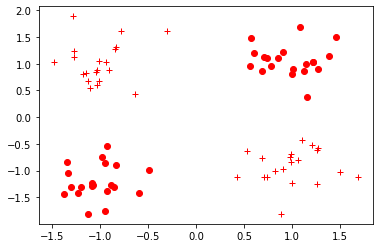

tensor([[ 0.9312,  1.1672],
        [-1.0057, -1.1212],
        [-1.3784,  0.7913],
        [ 0.9798,  1.3015],
        [ 0.5347,  0.8849],
        [-0.9804,  1.1714],
        [-0.8167, -0.9511],
        [-0.8376,  1.0648],
        [ 0.9013,  1.0348],
        [ 1.2241, -0.8359],
        [-0.8237, -0.8953],
        [-0.7626, -0.3554],
        [-0.9356,  0.5220],
        [-1.5507, -1.3661],
        [-1.1508,  1.0776],
        [ 1.1883,  0.8265],
        [ 1.1498, -1.0325],
        [ 0.8950, -1.1278],
        [ 1.2292, -1.3234],
        [ 1.1319, -0.7815]]) tensor([0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1.,
        1., 1.])


In [13]:
def vis_data(x, y=None, c='r'):
    if y is None:
        y = [None] * len(x)
    for x_, y_ in zip(x, y):
        if y_ is None:
            plt.plot(x_[0], x_[1], '*',
                     markerfacecolor='none', markeredgecolor=c)
        else:
            plt.plot(x_[0], x_[1], c+'o' if y_ == 0 else c+'+')


plt.figure()
vis_data(x_train, y_train, c='r')
plt.show()
print(x_test, y_test)

In [8]:
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

In [11]:
class NeuralNet(torch.nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet, self).__init__()

        self.input_size = input_size
        self.hidden_size = hidden_size
        self.linear_1 = torch.nn.Linear(self.input_size, self.hidden_size)
        self.relu = torch.nn.ReLU()
        self.linear_2 = torch.nn.Linear(self.hidden_size, 1)
        self.sigmoid = torch.nn.Sigmoid()

    def forward(self, input_tensor):
        linear1 = self.linear_1(input_tensor)
        relu = self.relu(linear1)
        linear2 = self.linear_2(relu)
        output = self.sigmoid(linear2)
        return output

In [12]:
model = NeuralNet(2, 5)
lr = 0.03
criterion = torch.nn.BCELoss()
epochs = 2000
optimizer = torch.optim.SGD(model.parameters(), lr = lr)

In [21]:
model.eval()
test_loss_before = criterion(model(x_test).squeeze(), y_test)
print(test_loss_before.item())

0.7073954939842224


In [25]:
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    train_output = model(x_train)
    train_loss = criterion(train_output.squeeze(), y_train)
    if epoch % 100 == 0:
        print(epoch, train_loss.item())
    train_loss.backward()
    optimizer.step()

0 0.05443422123789787
100 0.051155634224414825
200 0.048217110335826874
300 0.045570001006126404
400 0.04317460581660271
500 0.04100388288497925
600 0.03902820497751236
700 0.03722168132662773
800 0.03556519001722336
900 0.03403909131884575
1000 0.03262888640165329
1100 0.03132230043411255
1200 0.03010876104235649
1300 0.02897893264889717
1400 0.02792465128004551
1500 0.02693871594965458
1600 0.026014763861894608
1700 0.025147264823317528
1800 0.024331357330083847
1900 0.023562680929899216


In [26]:
model.eval()
test_loss_after = criterion(model(x_test).squeeze(), y_test)
print(test_loss_after.item())

print(model(torch.FloatTensor([-1,1])).item())

0.01787348836660385
0.9975256323814392
